In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sci
from numpy.linalg import inv

### Load the data

In [2]:
audio = sci.loadmat("amp_data.mat", squeeze_me=False)

In [3]:
audio = np.array(audio['amp_data'])
type(audio)

numpy.ndarray

In [4]:
audio.shape

(33713280, 1)

# Q1

# a)

### Plot a line graph of data

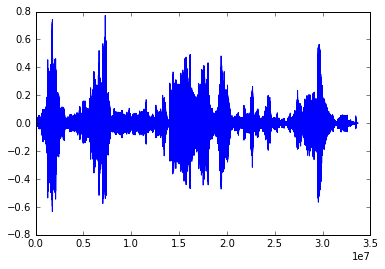

In [5]:
plt.plot(audio)

### Plot histogram of data

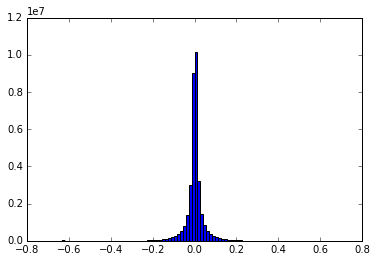

In [6]:
bins = plt.hist(audio, 100)

# b)

### Generate the matrix

In [7]:
C = len(audio) // 21
throw_away = len(audio) % 21
print throw_away
audio = audio[:-throw_away]
audio = audio.reshape(C, 21)

6


In [9]:
audio.shape
print audio[0, :]

[  0.00000000e+00  -3.05175781e-05   6.10351562e-05  -6.10351562e-05
   6.10351562e-05  -6.10351562e-05   0.00000000e+00   6.10351562e-05
  -9.15527344e-05   1.22070312e-04  -1.22070312e-04   9.15527344e-05
  -3.05175781e-05  -3.05175781e-05   6.10351562e-05  -6.10351562e-05
   6.10351562e-05  -6.10351562e-05   6.10351562e-05  -6.10351562e-05
   6.10351562e-05]


### Randomly shuffle the rows of the matrix

In [10]:
np.random.seed(0)
np.random.shuffle(audio)

### Split into training, test and validation sets

In [11]:
train_size = int(np.floor(0.7 * C))
val_size = int(np.floor(0.15 * C))
test_size = int(C - train_size - val_size)
print train_size
print val_size
print test_size

1123775
240809
240810


In [12]:
train_set = audio[0:train_size]
train_set.shape

(1123775, 21)

In [13]:
test_set = audio[train_size+1:train_size+test_size]
test_set.shape

(240809, 21)

In [14]:
val_set = audio[train_size+test_size+1:]
val_set.shape

(240808, 21)

### Training

In [15]:
X_shuf_train = train_set[:, :20]
X_shuf_train.shape

(1123775, 20)

In [16]:
y_shuf_train = train_set[:, 20:21]
y_shuf_train.shape

(1123775, 1)

### Validation

In [17]:
X_shuf_val = val_set[:, :20]
X_shuf_val.shape

(240808, 20)

In [18]:
y_shuf_val = val_set[:, 20:21]
y_shuf_val.shape

(240808, 1)

### Test

In [19]:
X_shuf_test = test_set[:, :20]
X_shuf_test.shape

(240809, 20)

In [20]:
y_shuf_test = test_set[:, 20:21]
y_shuf_test.shape

(240809, 1)

# Q2

### Plot one row of X_shuf_train

In [21]:
# TODO: use linspace
x_ticks = np.array([round(x/float(20), 2) for x in range(0, 20)])
x_ticks

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95])

In [22]:
row_number = np.random.randint(0, X_shuf_train.shape[0])
row_number

796925

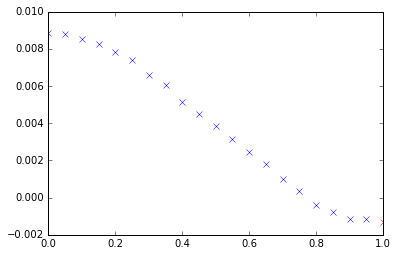

In [23]:
X_shuf_train_row = X_shuf_train[row_number, :]
plt.plot(x_ticks, X_shuf_train_row, 'bx')
plt.plot([1], y_shuf_train[row_number, :], 'rx')
plt.show()

### Fit Straight Line Through Points

In [24]:
def phi_linear(Xin):
    return np.array([np.ones(len(Xin)), Xin]).T

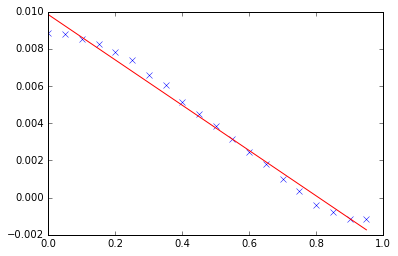

In [25]:
w_fit = np.linalg.lstsq(phi_linear(x_ticks), X_shuf_train_row)[0]
line = np.dot(phi_linear(x_ticks), w_fit)
plt.plot(x_ticks, X_shuf_train_row, 'bx')
plt.plot(x_ticks, line, 'r-')
plt.show()

### Fit Polynomial

In [26]:
def phi_poly(Xin):
    return np.array([np.ones(len(Xin)), Xin, Xin**2, Xin**3, Xin**4]).T

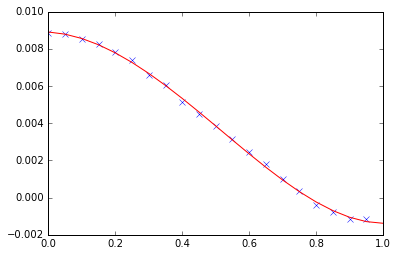

In [27]:
poly_ticks = np.append(x_ticks, [1])
w_fit = np.linalg.lstsq(phi_poly(x_ticks), X_shuf_train_row)[0]
poly_line = np.dot(phi_poly(poly_ticks), w_fit)
plt.plot(x_ticks, X_shuf_train_row, 'bx')
plt.plot(poly_ticks, poly_line, 'r-')
plt.show()

### Side Note: Function that does everything in one

In [237]:
def predict_and_plot_random_row(row_number):
    X_shuf_train_row = X_shuf_train[row_number, :]
    poly_ticks = np.append(x_ticks, [1])
    w_fit = np.linalg.lstsq(phi_poly(x_ticks), X_shuf_train_row)[0]
    poly_line = np.dot(phi_poly(poly_ticks), w_fit)
    plt.plot(x_ticks, X_shuf_train_row, 'bx')
    plt.plot(poly_ticks, poly_line, 'r-')
    plt.show()

# Q3

### b) i)

In [28]:
def row_constructor(c, K):
    return np.array([c**i for i in range(0, K)])

In [29]:
def Phi(C, K):
    t_values = np.linspace((19-C+1)/float(20), 19/float(20), C)
    return np.array([row_constructor(i, K) for i in t_values])

In [30]:
Phi(20, 2)

array([[ 1.  ,  0.  ],
       [ 1.  ,  0.05],
       [ 1.  ,  0.1 ],
       [ 1.  ,  0.15],
       [ 1.  ,  0.2 ],
       [ 1.  ,  0.25],
       [ 1.  ,  0.3 ],
       [ 1.  ,  0.35],
       [ 1.  ,  0.4 ],
       [ 1.  ,  0.45],
       [ 1.  ,  0.5 ],
       [ 1.  ,  0.55],
       [ 1.  ,  0.6 ],
       [ 1.  ,  0.65],
       [ 1.  ,  0.7 ],
       [ 1.  ,  0.75],
       [ 1.  ,  0.8 ],
       [ 1.  ,  0.85],
       [ 1.  ,  0.9 ],
       [ 1.  ,  0.95]])

### ii)

In [31]:
def make_vv(C, K):
    phi_1 = row_constructor(1, K).T
    phi = Phi(C, K)
    return np.array([phi_1.T.dot(inv(phi.T.dot(phi))).dot(phi.T)])

In [32]:
make_vv(3, 4)

array([[ 1.23022461, -2.75805664,  3.21118164]])

### iii)

#### Phi Predictions

In [33]:
linear_vv = make_vv(20, 2)
quart_vv = make_vv(20, 5)

In [34]:
row_number = np.random.randint(0, X_shuf_train.shape[0])
training_row = X_shuf_train[row_number, :]

In [35]:
linear_vv_y = linear_vv.dot(training_row.T)
quart_vv_y = quart_vv.dot(training_row.T)
print linear_vv_y
print quart_vv_y

[ 0.05725708]
[ 0.00791362]


#### (q2) old code on new data 

In [36]:
x_ticks = np.array([round(x/float(20), 2) for x in range(0, 20)])
poly_ticks = np.append(x_ticks, [1])

linear_fit_y = np.linalg.lstsq(phi_linear(x_ticks), training_row)[0]
linear_line_y = np.dot(phi_linear(poly_ticks), linear_fit_y)

quart_fit_y = np.linalg.lstsq(phi_poly(x_ticks), training_row)[0]
quart_line_y = np.dot(phi_poly(poly_ticks), quart_fit_y)

In [37]:
print linear_line_y[20:]
print quart_line_y[20:]

[ 0.05725708]
[ 0.00791362]


### c)

### i)

In [38]:
def least_sum_of_squares(vv, training_row):
    y_prediction = vv.dot(training_row.T)
    return y_prediction

In [45]:
min_lss = 1000
min_C = 0
min_K = 0

training_rows = []
random_rows = np.random.randint(X_shuf_train.shape[0], size=3000)
training_rows = X_shuf_train[random_rows,:]

In [47]:
for C in range(2, 20):
    for K in range(1, 21):
        #Generate our matrix for C and K
        vv = make_vv(C, K)
        lss = np.array([])
        #Loop through 10 different training rows
        for i in range(0, 3000):
            row = np.array(training_rows[i])
            #Generate a new training row to evaluate
            training_row = row[len(row)-C:]
            lss = np.append(lss, [least_sum_of_squares(vv, training_row)])
        if (np.mean(lss) < min_lss):
            min_C = C
            min_K = K
            min_lss = np.mean(lss)

In [318]:
min_C

10

In [319]:
min_K

18